In [1]:
######## Package setup ########
import sys
sys.path.insert(0,'..')

In [2]:
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot
from sklearn import preprocessing

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [5]:
######## Read Data ########
df = pd.read_csv("OLIVINES.csv", encoding = 'unicode_escape')
df.head()

,CITATION,SAMPLE NAME,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MIN.),LONGITUDE (MAX.),LAND/SEA (SAMPLING),...,LAIHUNITE(MOL%),LARNITE(MOL%),LIEBENBERGITE(MOL%),MONTICELLITE(MOL%),ORTHOCLASE(MOL%),TEPHROITE(MOL%),WOLLASTONITE(MOL%),AGE(KA),AGE(MA),Unnamed: 371
0,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_cols = ['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)',
            'NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)',
            'K2O(WT%)','NI(PPM)','P2O5(WT%)']
df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

MGO(WT%)      171396
SIO2(WT%)     170277
FEOT(WT%)     165853
CAO(WT%)      159102
MNO(WT%)      157504
NIO(WT%)      148166
AL2O3(WT%)     95462
CR2O3(WT%)     87881
TIO2(WT%)      76680
NA2O(WT%)      39980
K2O(WT%)       25302
NI(PPM)        17848
P2O5(WT%)      10764
dtype: int64


<AxesSubplot:>

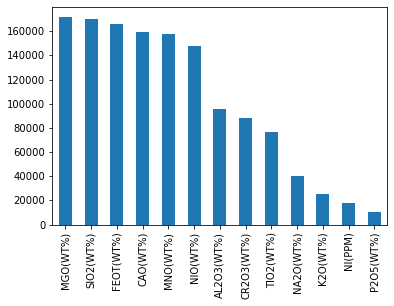

In [7]:
df1 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
df2 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)']]
df3 = df[['CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
print(df1.count(axis = 0))
(df1.count(axis = 0)).plot.bar()

In [8]:
df2.describe()

,MGO(WT%),SIO2(WT%),FEOT(WT%),CAO(WT%),MNO(WT%),NIO(WT%),AL2O3(WT%)
count,171396.000000,170277.000000,165853.000000,159102.000000,157504.000000,148166.000000,95462.000000
mean,42.738403,39.215618,16.988865,0.417316,0.371249,0.221120,0.068288
std,7.489092,1.885793,8.486794,2.579741,1.096792,0.176255,0.692292
min,0.000000,0.052000,0.000000,0.000000,-0.058549,0.000000,-0.010000
25%,39.439999,38.391998,11.014876,0.130000,0.160000,0.097800,0.010000
50%,44.014084,39.459999,15.710000,0.243017,0.240000,0.220000,0.027252
75%,47.853775,40.349998,21.070000,0.320000,0.386100,0.336500,0.050000
max,66.100037,65.207321,72.260002,49.119999,42.509998,37.450001,41.580002


In [9]:
df3.describe()

,CR2O3(WT%),TIO2(WT%),NA2O(WT%),K2O(WT%),NI(PPM),P2O5(WT%)
count,87881.000000,76680.000000,39980.000000,25302.000000,17848.000000,10764.000000
mean,0.039672,0.037711,0.053504,0.026635,2386.097168,0.033884
std,0.125087,0.260975,0.157132,0.145641,1019.938660,0.106478
min,-0.003200,-0.004800,-0.002070,-0.001860,0.000000,0.000000
25%,0.008000,0.002882,0.000000,0.000000,1697.512573,0.002000
50%,0.028200,0.017000,0.010000,0.002000,2439.837402,0.010100
75%,0.053400,0.035100,0.030000,0.020000,2979.434570,0.035000
max,21.820000,41.459999,9.770000,10.154000,12070.000000,4.500000


In [10]:
######## MGO ########
bins = [0,25,30,35,40,45,50,55,100]
df['MGO(WT%)'] = df['MGO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MGO(WT%)'], bins)

0         (45.0, 50.0]
1         (45.0, 50.0]
2         (40.0, 45.0]
3         (25.0, 30.0]
4          (0.0, 25.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: MGO(WT%), Length: 188813, dtype: category
Categories (8, interval[int64]): [(0, 25] < (25, 30] < (30, 35] < (35, 40] < (40, 45] < (45, 50] < (50, 55] < (55, 100]]

In [11]:
df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()

MGO(WT%)
(0, 25]       4256
(25, 30]      2822
(30, 35]      8309
(35, 40]     30531
(40, 45]     49966
(45, 50]     60556
(50, 55]     14630
(55, 100]      291
Name: MGO(WT%), dtype: int64

<AxesSubplot:xlabel='MGO(WT%)'>

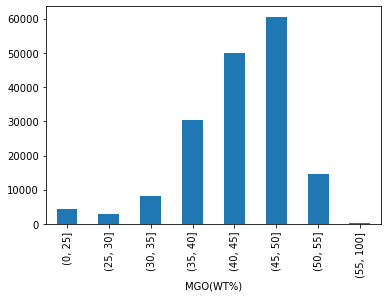

In [12]:
(df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'MGO - MGO mean value (wt%)')

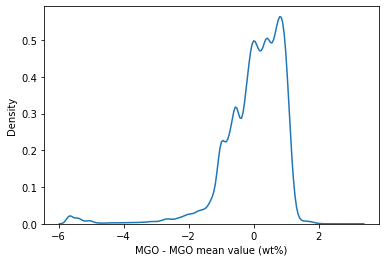

In [16]:
df['MGO(WT%)']=standardization(df['MGO(WT%)'])
sns.kdeplot(df['MGO(WT%)'])
plt.xlabel('MGO - MGO mean value (wt%)',size=10)

In [17]:
######## SIO2 ########
bins = [0,28,30,32,34,36,38,40,42,43,100]
df['SIO2(WT%)'] = df['SIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['SIO2(WT%)'], bins)

0         (38.0, 40.0]
1         (40.0, 42.0]
2         (38.0, 40.0]
3         (34.0, 36.0]
4         (34.0, 36.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: SIO2(WT%), Length: 188813, dtype: category
Categories (10, interval[int64]): [(0, 28] < (28, 30] < (30, 32] < (32, 34] ... (38, 40] < (40, 42] < (42, 43] < (43, 100]]

In [18]:
df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()

SIO2(WT%)
(0, 28]        175
(28, 30]      1036
(30, 32]       873
(32, 34]       810
(34, 36]      2984
(36, 38]     23976
(38, 40]     81849
(40, 42]     57242
(42, 43]      1020
(43, 100]      312
Name: SIO2(WT%), dtype: int64

<AxesSubplot:xlabel='SIO2(WT%)'>

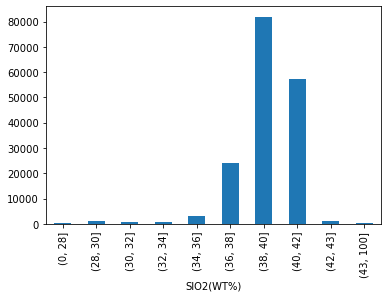

In [19]:
(df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'SIO2 - SIO2 mean value (wt%)')

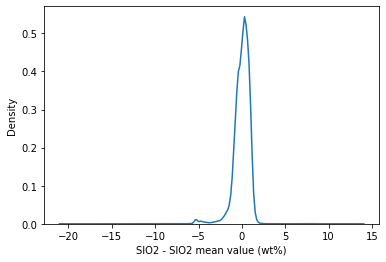

In [20]:
df['SIO2(WT%)']=standardization(df['SIO2(WT%)'])
sns.kdeplot(df['SIO2(WT%)'])
plt.xlabel('SIO2 - SIO2 mean value (wt%)',size=10)

In [21]:
######## FEOT ########
bins = [0,10,20,30,40,50,55,100]
df['FEOT(WT%)'] = df['FEOT(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['FEOT(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: FEOT(WT%), Length: 188813, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 55] < (55, 100]]

In [22]:
df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()

FEOT(WT%)
(0, 10]      30913
(10, 20]     87897
(20, 30]     39322
(30, 40]      4745
(40, 50]       926
(50, 55]       259
(55, 100]     1718
Name: FEOT(WT%), dtype: int64

<AxesSubplot:xlabel='FEOT(WT%)'>

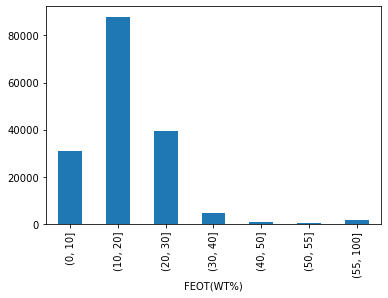

In [23]:
(df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='FEO(WT%)', ylabel='Density'>

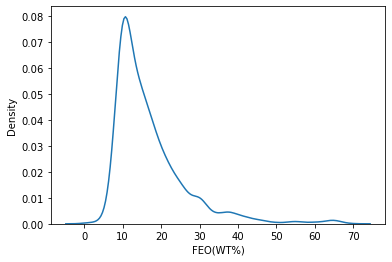

In [21]:
df['FEOT(WT%)']=standardization(df['FEOT(WT%)'])
sns.kdeplot(df['FEO(WT%)'])
plt.xlabel('SIO2 - SIO2 mean value (wt%)',size=10)

In [24]:
######## CAO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CAO(WT%)'] = df['CAO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CAO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.3, 0.4]
2         (0.3, 0.4]
3         (0.3, 0.4]
4         (0.2, 0.3]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: CAO(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [25]:
df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()

CAO(WT%)
(0.0, 0.1]       30891
(0.1, 0.2]       26212
(0.2, 0.3]       50468
(0.3, 0.4]       35576
(0.4, 0.5]        9996
(0.5, 0.6]        1698
(0.6, 0.7]         568
(0.7, 0.8]         248
(0.8, 0.9]         179
(0.9, 1.0]         116
(1.0, 35.0]        853
(35.0, 100.0]      404
Name: CAO(WT%), dtype: int64

<AxesSubplot:xlabel='CAO(WT%)'>

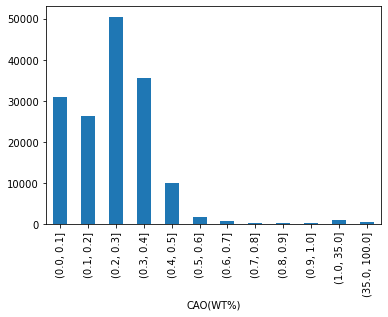

In [26]:
(df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'CAO - CAO mean value (wt%)')

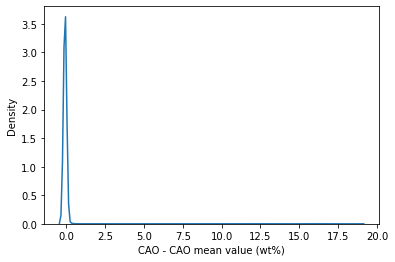

In [28]:
df['CAO(WT%)']=standardization(df['CAO(WT%)'])
sns.kdeplot(df['CAO(WT%)'])
plt.xlabel('CAO - CAO mean value (wt%)',size=10)

In [29]:
######## MNO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['MNO(WT%)'] = df['MNO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MNO(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: MNO(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [30]:
df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()

MNO(WT%)
(0.0, 0.1]        5647
(0.1, 0.2]       52724
(0.2, 0.3]       41947
(0.3, 0.4]       18801
(0.4, 0.5]       13838
(0.5, 0.6]       11921
(0.6, 0.7]        5485
(0.7, 0.8]        1683
(0.8, 0.9]         889
(0.9, 1.0]         470
(1.0, 35.0]       3298
(35.0, 100.0]        1
Name: MNO(WT%), dtype: int64

<AxesSubplot:xlabel='MNO(WT%)'>

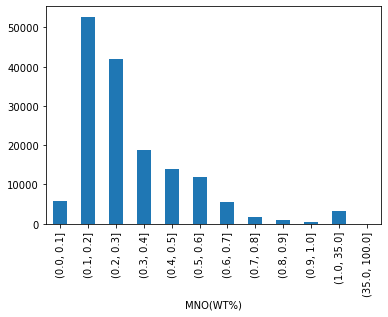

In [31]:
(df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'MNO - MNO mean value (wt%)')

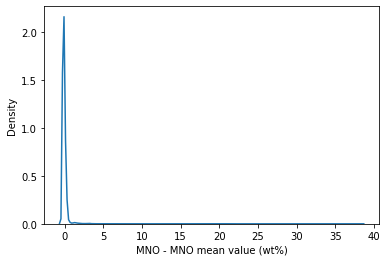

In [32]:
df['MNO(WT%)']=standardization(df['MNO(WT%)'])
sns.kdeplot(df['MNO(WT%)'])
plt.xlabel('MNO - MNO mean value (wt%)',size=10)

In [37]:
######## NIO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['NIO(WT%)'] = df['NIO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NIO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.2, 0.3]
2         (0.2, 0.3]
3         (0.0, 0.1]
4         (0.0, 0.1]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: NIO(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [73]:
df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()

NIO(WT%)
(0.0, 0.1]        4464
(0.1, 0.2]        5546
(0.2, 0.3]        5507
(0.3, 0.4]        5679
(0.4, 0.5]        4864
(0.5, 0.6]        6392
(0.6, 0.7]        6366
(0.7, 0.8]        6920
(0.8, 0.9]        5646
(0.9, 1.0]        6234
(1.0, 35.0]      15229
(35.0, 100.0]        1
Name: NIO(WT%), dtype: int64

<AxesSubplot:xlabel='NIO(WT%)'>

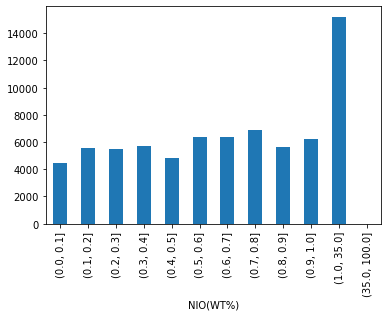

In [82]:
(df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NIO(WT%)', ylabel='Density'>

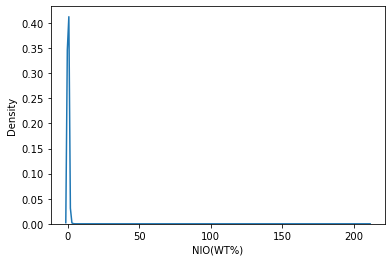

In [79]:
df['NIO(WT%)']=standardization(df['NIO(WT%)'])
sns.kdeplot(df['NIO(WT%)'])

In [39]:
######## AL2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['AL2O3(WT%)'] = df['AL2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['AL2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: AL2O3(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [40]:
df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()

AL2O3(WT%)
(0.0, 0.1]       73452
(0.1, 0.2]        3701
(0.2, 0.3]         970
(0.3, 0.4]         382
(0.4, 0.5]         180
(0.5, 0.6]         109
(0.6, 0.7]          93
(0.7, 0.8]          63
(0.8, 0.9]          37
(0.9, 1.0]          36
(1.0, 35.0]        509
(35.0, 100.0]       16
Name: AL2O3(WT%), dtype: int64

<AxesSubplot:xlabel='AL2O3(WT%)'>

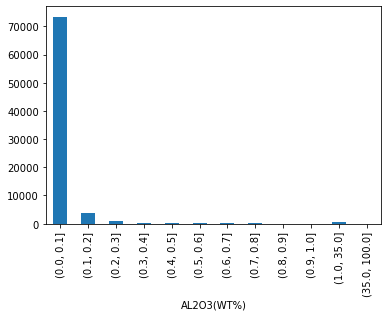

In [41]:
(df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()).plot.bar()

In [42]:
######## CR2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CR2O3(WT%)'] = df['CR2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CR2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: CR2O3(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [43]:
df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()

CR2O3(WT%)
(0.0, 0.1]       65379
(0.1, 0.2]        5264
(0.2, 0.3]         620
(0.3, 0.4]         153
(0.4, 0.5]          54
(0.5, 0.6]          26
(0.6, 0.7]          10
(0.7, 0.8]           9
(0.8, 0.9]           7
(0.9, 1.0]           2
(1.0, 35.0]         29
(35.0, 100.0]        0
Name: CR2O3(WT%), dtype: int64

<AxesSubplot:xlabel='CR2O3(WT%)'>

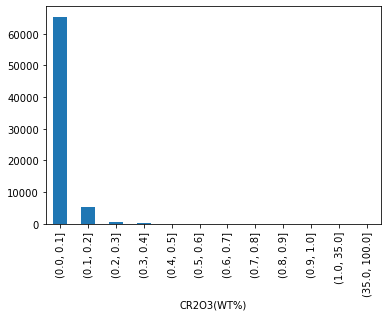

In [44]:
(df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='CR2O3(WT%)', ylabel='Density'>

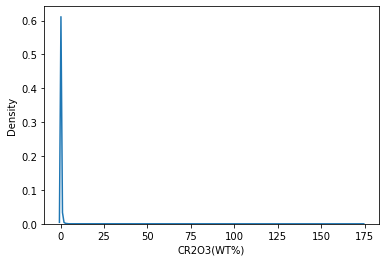

In [45]:
df['CR2O3(WT%)']=standardization(df['CR2O3(WT%)'])
sns.kdeplot(df['CR2O3(WT%)'])

In [46]:
######## TIO2 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['TIO2(WT%)'] = df['TIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['TIO2(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: TIO2(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [47]:
df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()

TIO2(WT%)
(0.0, 0.1]       52877
(0.1, 0.2]        4392
(0.2, 0.3]        1776
(0.3, 0.4]         196
(0.4, 0.5]          53
(0.5, 0.6]          48
(0.6, 0.7]          13
(0.7, 0.8]          20
(0.8, 0.9]          17
(0.9, 1.0]          12
(1.0, 35.0]         62
(35.0, 100.0]        2
Name: TIO2(WT%), dtype: int64

<AxesSubplot:xlabel='TIO2(WT%)'>

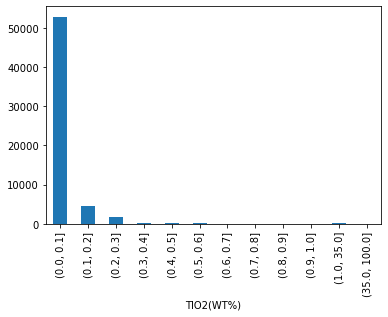

In [48]:
(df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='TIO2(WT%)', ylabel='Density'>

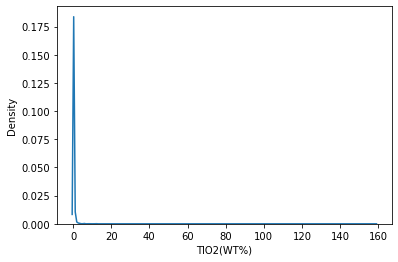

In [49]:
df['TIO2(WT%)']=standardization(df['TIO2(WT%)'])
sns.kdeplot(df['TIO2(WT%)'])

In [50]:
######## NA2O ########
bins = [0,10,20,30,40,50,55,100]
df['NA2O(WT%)'] = df['NA2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NA2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NA2O(WT%), Length: 188813, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 55] < (55, 100]]

In [52]:
df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()

NA2O(WT%)
(0, 10]      29309
(10, 20]         0
(20, 30]         0
(30, 40]         0
(40, 50]         0
(50, 55]         0
(55, 100]        0
Name: NA2O(WT%), dtype: int64

<AxesSubplot:xlabel='NA2O(WT%)'>

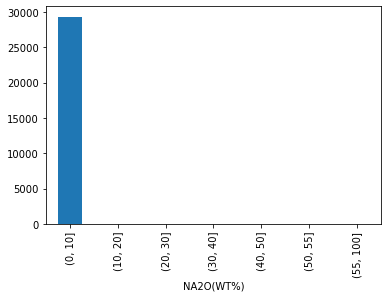

In [53]:
(df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NA2O(WT%)', ylabel='Density'>

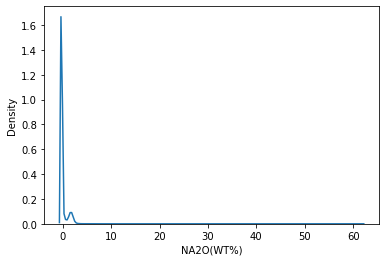

In [54]:
df['NA2O(WT%)']=standardization(df['NA2O(WT%)'])
sns.kdeplot(df['NA2O(WT%)'])

In [55]:
######## K2O ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['K2O(WT%)'] = df['K2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['K2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: K2O(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [56]:
df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()

K2O(WT%)
(0.0, 0.1]       11209
(0.1, 0.2]        1979
(0.2, 0.3]          88
(0.3, 0.4]          29
(0.4, 0.5]          20
(0.5, 0.6]           8
(0.6, 0.7]           4
(0.7, 0.8]           2
(0.8, 0.9]           1
(0.9, 1.0]           5
(1.0, 35.0]         27
(35.0, 100.0]        0
Name: K2O(WT%), dtype: int64

<AxesSubplot:xlabel='K2O(WT%)'>

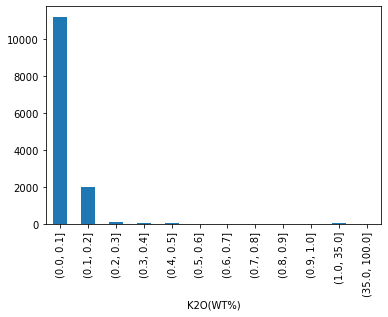

In [58]:
(df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='K2O(WT%)', ylabel='Density'>

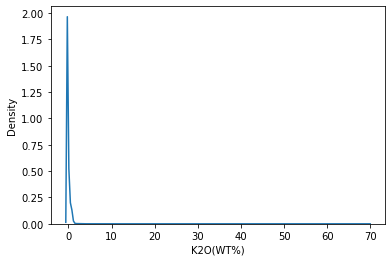

In [59]:
df['K2O(WT%)']=standardization(df['K2O(WT%)'])
sns.kdeplot(df['K2O(WT%)'])

In [62]:
######## NI ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100,100000]
df['NI(PPM)'] = df['NI(PPM)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NI(PPM)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NI(PPM), Length: 188813, dtype: category
Categories (13, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0] < (100.0, 100000.0]]

In [63]:
df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()

NI(PPM)
(0.0, 0.1]               1
(0.1, 0.2]               1
(0.2, 0.3]               1
(0.3, 0.4]               2
(0.4, 0.5]               0
(0.5, 0.6]               0
(0.6, 0.7]               0
(0.7, 0.8]               0
(0.8, 0.9]               0
(0.9, 1.0]               0
(1.0, 35.0]             16
(35.0, 100.0]           16
(100.0, 100000.0]    17803
Name: NI(PPM), dtype: int64

<AxesSubplot:xlabel='NI(PPM)'>

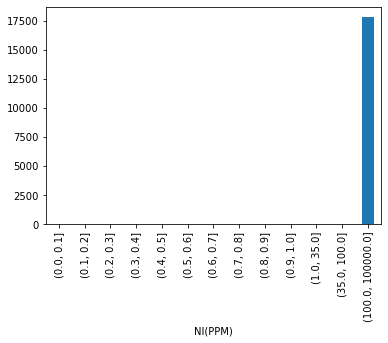

In [64]:
(df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NI(PPM)', ylabel='Density'>

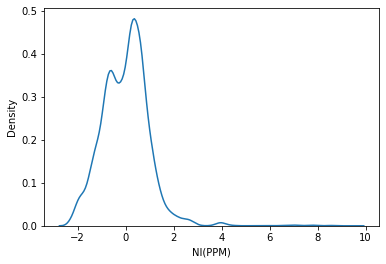

In [65]:
df['NI(PPM)']=standardization(df['NI(PPM)'])
sns.kdeplot(df['NI(PPM)'])

In [71]:
######## P2O5 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['P2O5(WT%)'] = df['P2O5(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['P2O5(WT%)'], bins)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: P2O5(WT%), Length: 188813, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [72]:
df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()

P2O5(WT%)
(0.0, 0.1]       7639
(0.1, 0.2]        682
(0.2, 0.3]        112
(0.3, 0.4]         19
(0.4, 0.5]          6
(0.5, 0.6]          2
(0.6, 0.7]          3
(0.7, 0.8]          1
(0.8, 0.9]          2
(0.9, 1.0]          2
(1.0, 35.0]        17
(35.0, 100.0]       0
Name: P2O5(WT%), dtype: int64

<AxesSubplot:xlabel='P2O5(WT%)'>

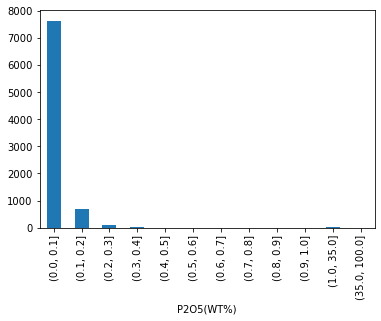

In [73]:
(df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()).plot.bar()